In [1]:
import pandas as pd
import numpy as np

import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


kaggle/input/.DS_Store
kaggle/input/titanic/tableTitanic
kaggle/input/titanic/test.csv
kaggle/input/titanic/train.csv
kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('kaggle/input/titanic/train.csv')

In [4]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

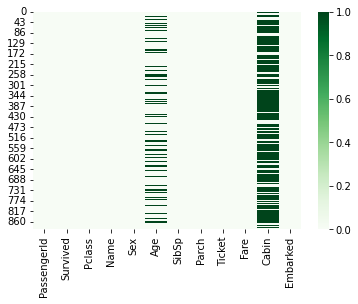

In [6]:
sns.heatmap(train.isnull(), cmap='Greens')

<AxesSubplot:xlabel='Survived', ylabel='count'>

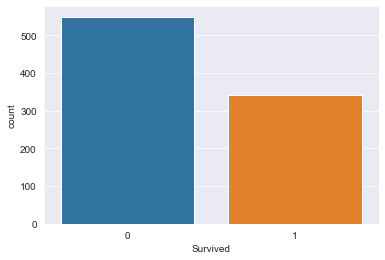

In [7]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

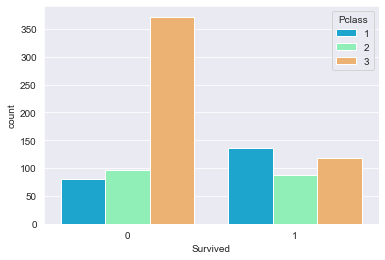

In [8]:
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

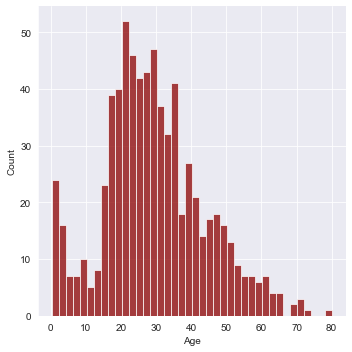

In [9]:
sns.displot(train['Age'].dropna(), kde=False, color='darkred', bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

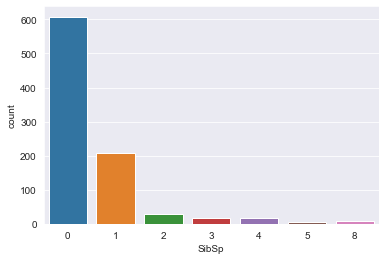

In [10]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

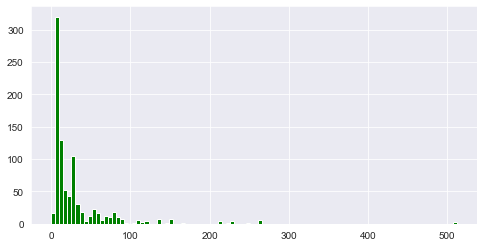

In [11]:
train['Fare'].hist(color='green', bins=100, figsize=(8,4))

In [12]:
import cufflinks as cf
cf.go_offline()
train['Fare'].iplot(kind='hist', bins=30, color='green')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

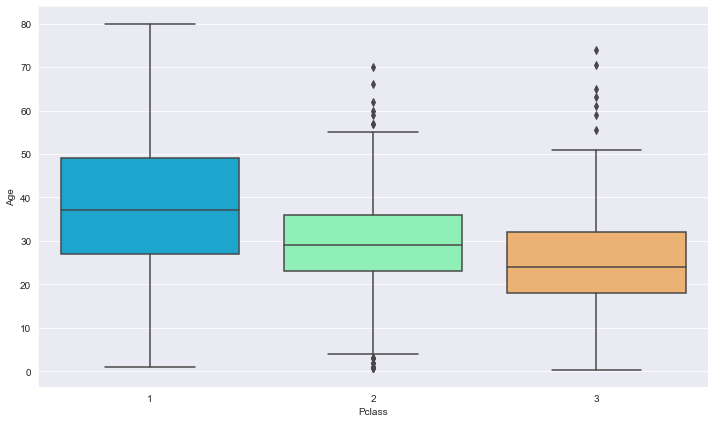

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='rainbow')

In [33]:
def impute_age(cols):
    Age = cols[0]
    Pclass = int(cols[1])


    if pd.isnull(Age):
        match Pclass:
            case 1:
                Age = 39
            case 2:
                Age = 29
            case 3:
                Age = 24
            case _:
                print('Fail')
    return Age

In [34]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [35]:
train.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

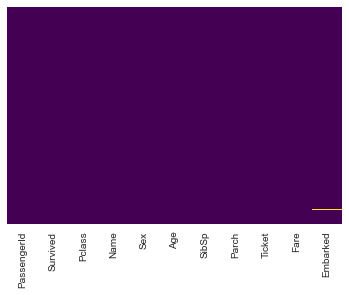

In [36]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [37]:
train.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [47]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

In [52]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [53]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [55]:
train = pd.concat([train, sex, embark], axis=1)

In [56]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [57]:
train.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [58]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.30, random_state=101)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=50)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [82]:
predictions = neigh.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
accuracy = confusion_matrix(y_test, predictions)

In [85]:
accuracy

array([[151,   3],
       [ 98,  16]])

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.6231343283582089

In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.61      0.98      0.75       154
           1       0.84      0.14      0.24       114

    accuracy                           0.62       268
   macro avg       0.72      0.56      0.49       268
weighted avg       0.71      0.62      0.53       268

